In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df_test = pd.read_csv("C:/Users/Mario/Desktop/UniPi/1° semestre/Data Mining 1/Datasets/DatasetProject1/Test_HR_Employee_Attrition.csv")
df_train = pd.read_csv("C:/Users/Mario/Desktop/UniPi/1° semestre/Data Mining 1/Datasets/DatasetProject1/Train_HR_Employee_Attrition.csv")

frame = [df_test, df_train]
df3 = pd.concat(frame)
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,763,Sales,15,2,Medical,1,Male,...,4,80.0,2,7,1.0,2,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,Male,...,1,NaN,3,10,2.0,3,8.0,0,0,0
2,56.0,No,Non-Travel,150,Research & Development,2,4,Technical Degree,4,Male,...,3,80.0,1,12,2.0,2,13.0,3,1,4
3,41.0,Yes,NaN,359,Human Resources,18,5,Human Resources,4,Male,...,3,80.0,0,2,4.0,3,3.0,0,0,0
4,42.0,No,NaN,642,Research & Development,1,3,Life Sciences,4,Male,...,1,NaN,1,12,6.0,3,5.0,3,1,0


**DATA UNDERSTANDING**

In [153]:
#tabella con 19 attributi
new_df = df3[['Age', 'Attrition', 'BusinessTravel',  'Department', 'DistanceFromHome', 'Education', 'EducationField','HourlyRate',
       'EnvironmentSatisfaction','Gender',  'JobLevel',  'JobSatisfaction', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance',  'YearsAtCompany', 'YearsInCurrentRole']]
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,27.0,Yes,Travel_Frequently,Sales,15,2,Medical,59,1,Male,2,4,Yes,14,2,7,2,2.0,2
1,30.0,Yes,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,3,3,No,13,3,10,3,8.0,0
2,56.0,No,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,2,4,No,11,1,12,2,13.0,3
3,41.0,Yes,NaN,Human Resources,18,5,Human Resources,89,4,Male,1,1,No,17,0,2,3,3.0,0
4,42.0,No,NaN,Research & Development,1,3,Life Sciences,76,4,Male,1,4,No,22,1,12,3,5.0,3


In [154]:
new_df = new_df.replace(to_replace="Yes", value=1, inplace=False, limit=None, regex=False, method='pad')
new_df = new_df.replace(to_replace="No", value=0, inplace=False, limit=None, regex=False, method='pad')

new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,27.0,1,Travel_Frequently,Sales,15,2,Medical,59,1,Male,2,4,1,14,2,7,2,2.0,2
1,30.0,1,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,3,3,0,13,3,10,3,8.0,0
2,56.0,0,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,2,4,0,11,1,12,2,13.0,3
3,41.0,1,NaN,Human Resources,18,5,Human Resources,89,4,Male,1,1,0,17,0,2,3,3.0,0
4,42.0,0,NaN,Research & Development,1,3,Life Sciences,76,4,Male,1,4,0,22,1,12,3,5.0,3


In [155]:
round((new_df.isnull().sum()/len(new_df))*100, 2) #Percentuale di valori mancanti per ogni colonna

Age                        14.42
Attrition                   0.00
BusinessTravel              8.91
Department                  0.00
DistanceFromHome            0.00
Education                   0.00
EducationField              0.00
HourlyRate                  0.00
EnvironmentSatisfaction     0.00
Gender                      5.10
JobLevel                    0.00
JobSatisfaction             0.00
OverTime                    0.00
PercentSalaryHike           0.00
StockOptionLevel            0.00
TotalWorkingYears           0.00
WorkLifeBalance             0.00
YearsAtCompany              5.03
YearsInCurrentRole          0.00
dtype: float64

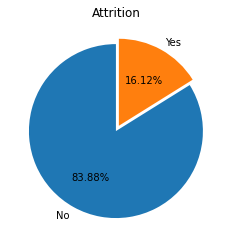

In [156]:
labels = ["No", "Yes"]
explode = [0,0.07]
plt.pie(new_df['Attrition'].value_counts(), labels=labels, startangle = 90, autopct="%1.2f%%", explode=explode)
plt.title("Attrition")
plt.show()

In [157]:
new_df.shape

(1470, 19)

In [158]:
new_df.describe()

,Age,Attrition,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
count,1258.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1396.000000,1470.000000
mean,37.115262,0.161224,9.192517,2.912925,65.891156,2.721769,2.063946,2.728571,0.282993,15.209524,0.793878,11.279592,2.761224,6.942693,4.229252
std,9.068654,0.367863,8.106864,1.024165,20.329428,1.093082,1.106940,1.102846,0.450606,3.659938,0.852077,7.780782,0.706476,6.033444,3.623137
min,18.000000,0.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,0.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,66.000000,3.000000,2.000000,3.000000,0.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,83.750000,4.000000,3.000000,4.000000,1.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,100.000000,4.000000,5.000000,4.000000,1.000000,25.000000,3.000000,40.000000,4.000000,40.000000,18.000000


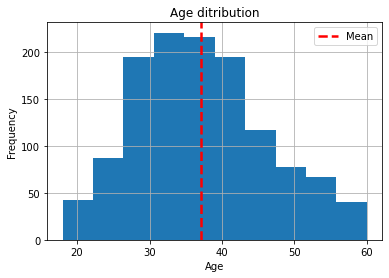

In [159]:
age_mean = new_df["Age"].mean()

new_df["Age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age ditribution")

plt.axvline(x=age_mean, linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.legend()

plt.show()

**DATA QUALITY**

In [160]:
new_df["BusinessTravel"].mode()

0    Travel_Rarely
dtype: object

In [165]:
#Riempio i valori mancanti
valori = {"Age": new_df["Age"].mean(),"Gender": "Male", "BusinessTravel": "TravelRarely", "YearsAtCompany": new_df["YearsAtCompany"].mean()}
new_df = new_df.fillna(value=valori)

new_df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
HourlyRate                 0
EnvironmentSatisfaction    0
Gender                     0
JobLevel                   0
JobSatisfaction            0
OverTime                   0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
dtype: int64

In [190]:
corrMatrix = new_df.corr()
corrMatrix.head()

,Age,Attrition,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
Age,1.000000,-0.013544,0.014153,0.006700,0.032777,0.020272,0.023950,-0.055259,-0.028224,-0.017884,0.037161,0.012147,0.016978,0.292071,0.026449
Attrition,-0.013544,1.000000,0.077924,-0.031373,-0.006846,-0.103369,-0.169105,-0.103481,0.246118,-0.013478,-0.137145,-0.171063,-0.063939,0.024480,-0.160545
DistanceFromHome,0.014153,0.077924,1.000000,0.021042,0.031131,-0.016075,0.005303,-0.003669,0.025514,0.040235,0.044872,0.004628,-0.026556,0.023158,0.018845
Education,0.006700,-0.031373,0.021042,1.000000,0.016775,-0.027128,0.101589,-0.011296,-0.020322,-0.011111,0.018422,0.148280,0.009819,0.030459,0.060236
HourlyRate,0.032777,-0.006846,0.031131,0.016775,1.000000,-0.049857,-0.027853,-0.071335,-0.007782,-0.009062,0.050263,-0.002334,-0.004607,0.003467,-0.024106


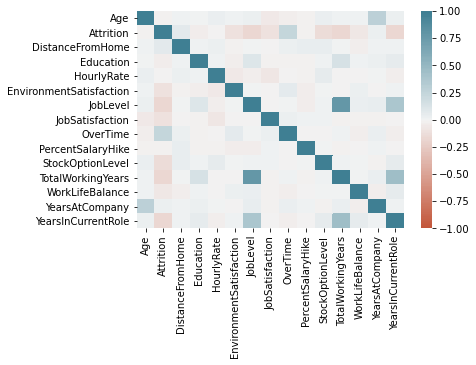

In [180]:
sn.heatmap(
    corrMatrix, 
    annot=False, 
    cmap=sn.diverging_palette(20, 220, n=200), 
    vmin=-1, 
    vmax=1, 
    center=0,)

plt.show()